# Biodiversity In National Parks

## Prompt

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose wuestions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Analysis Questions
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?



## Importing Python Libraries

These libraries are consistently used throughout the Jupyter Notebook to help analyze the data properly.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

First, the raw data from `species.csv` and `observation.csv` is imported into the Notebook and stored in pandas `DataFrames`. Additionally, the data is briefly viewed using the `.head()` function.

### species

The `species.csv` file represents a reference point to easily access information for many species. The accessable information is organized as:
- **category** - the species' class 
- **scientific_name** - the scietific name of each species
- **common_names** - the common name(s) of each species
- **consevation_status** - the conservation status of each species

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations

The `observations.csv` contains information regarding the species that are sighted within the National Park and the number of sightings of each species. The data is organized as:
- **scietific_name** - the scietific name of each species
- **park_name** - the name of the national park the species was sighted at
- **observations** - the number of times the species was sighted

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Next, there will be a way to see the dimension of the data. The `species` data set has 5824 rows and 4 columns, and the `observations` data set has 23,296 rows and 3 columns.

In [4]:
print("species shape: {}".format(species.shape))
print("observations shape: {}".format(observations.shape))

species shape: (5824, 4)
observations shape: (23296, 3)


## Exploring the Data

The following line allows for the amount of species within the `species` data set to be seen. There are 5541 unique species represented within the `species` data set.

In [5]:
print("number of species: {}".format(species.scientific_name.nunique()))

number of species: 5541


Next, the unique values for the `category` column to be viewed. Within the `species` data set, there are 7 unique categories: mammal, bird, reptile, amphibian, fish, vascular plant, nonvascular plant.

In [6]:
print("number of categories: {}".format(species.category.nunique()))
print("categories: {}".format(species.category.unique()))

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In order to further understand the data, the `species` data set is separated to see how many species represent each of the categories. By a large difference, vascular plants make up the greatest portion of the `species` data set whereas reptiles represent the smallest portion.

In [7]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Similar to the `category` column, the `conservation_status` column is investigated. There are 4 distinct values of this column: `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`. Additionally `nan` is a possibile value within the column.

In [8]:
print("number of conservation statuses: {}".format(species.conservation_status.nunique()))
print("conservation statuses: {}".format(species.conservation_status.unique()))

number of conservation statuses: 4
conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next, to understand how the `conservation_status` column is distributed, a table is created by grouping the `species` data set by the species `conservation_status`. This reveals that a majority of the species have `nan` as their `conservation_status` value. The lack of distinct value in this column represents that the species is not under and conservation status, for this data set.

In [9]:
print("nan values: {}".format(species.conservation_status.isna().sum()))

species.groupby('conservation_status').size()

nan values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

To continue the investigation of each column, `park_name` from the `observation` data set represents 4 different parks. These parks include `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, and `Yellowstone National Park`.

In [10]:
print("number of parks: {}".format(observations.park_name.nunique()))
print("park names: {}".format(observations.park_name.unique()))

number of parks: 4
park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Additionally, the total number of observations across every species and all parks resulted in being 3,314,739 total observations.

In [11]:
print("number of observations: {}".format(observations.observations.sum()))

number of observations: 3314739


## Analysis

To begin analysis on the two data sets, replacing the empty values of the `conservation_status` column allows the data to be processed and viewed in a better way.

In [12]:
species.fillna("No Intervention", inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next, to view the comparison of `conservation_status` with `category`, the following table is created. The table shows that there are 1 Amphibian, 4 Birds, 3 Fish, 7 Mammals, and 1 Vascular Plant that are `Endangered`. Additionally, the table represents the data for `In Recovery`, `Species of Concern`, and `Threatened` as well.

In [13]:
need_conservation = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
need_conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


To view this data in a graph form, each bar represents the level of `conservation_status`, and the color represents the `category` value of each species.

<Axes: xlabel='conservation_status'>

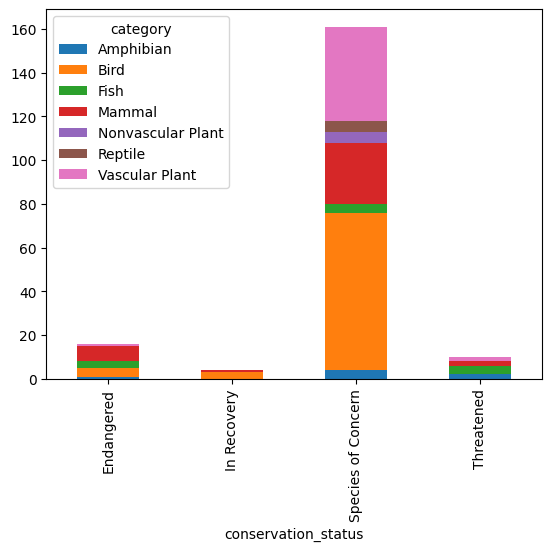

In [14]:
need_conservation.plot(kind = 'bar', stacked=True)

To easily separate the data into two groups, protected or not protected, a new column is added. The column `is_protected` contains boolean values to represent if each species is protected.

In [15]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Next, the `is_protected` column allows for the following table to be created. The table represents the number of species that are protected or not for each categories. From the table, it describes that `Birds` represent the largest number of protected species.

In [16]:
category_counted = species.groupby(['category', 'is_protected']).scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected', index= 'category', values = 'scientific_name')\
                        .reset_index()

category_counted.columns = ['category', 'not_protected', 'protected']

category_counted

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


With the inclusion of the `protected_percent` column, the portion of species protected within the species' class can easily be seen. The information that the `protected_percent` column represents is that `Mammals` have the highest percentage of protected species whereas `Vascular Plants` have the lowest protected portion.

In [17]:
category_counted['protected_percent'] = category_counted.protected / (category_counted.protected + category_counted.not_protected) * 100

category_counted

,category,not_protected,protected,protected_percent
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Since there are many species that are in need of protection, it is useful to understand the relationship between the categories and the rate of conservation. Using chi-squared tests, the `contingency1` table represent the `protected` and `not_protected` values of `Mammals` and `Birds`. From the statistical test, it results in a p-value of 0.68. Since the p-value is greater than 0.05, there is no statistical significance between the two categories at the 95% confidence threshold.

In [18]:
from scipy.stats import chi2_contingency

# Col [protected, not_protected]
# Rows [Mammal, Bird]

contingency1 = [[30, 146],
                [75, 413]]

chi2_contingency(contingency1)

# Since there is a pval of 0.68, there is no significant relationship between mammals and birds

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

Next, when checking the statistical significance between `Mammals` and `Reptiles`, the `contingency2` table is used within another chi-squared test. Resulting from the test, the p-value is 0.038, meaning that there is statistical significance between the conservation rate of `Mammals` and `Reptiles`.

In [19]:
# Rows [Mammal, Reptile]

contingency2 = [[30,146],
                [5, 73]]

chi2_contingency(contingency2)

# pval of 0.039 suggests the difference in protection of mammals and reptiles is statistically significant. 
# This shows that mammals have a significantly higher rate of protection than reptiles

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

For the next step in the analysis, the species will be separated to see what species are the most common from each of the parks. The first step of this analysis is to break down the species' common name to see what words are most common within the data set. From this analysis, the data shows that "Bat", "Shrew", "Myotis", "Mouse", and "Squirrel" are the most common words within the data set.

In [38]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text

common_names_sep = []

for name in species[species.category == 'Mammal'].common_names.apply(remove_punctuation):
    temp_list = name.split()
    for i in temp_list:
        common_names_sep.append(i)

print(list(set(common_names_sep)))

word_count = []

for word in list(set(common_names_sep)):
    counted = common_names_sep.count(word)
    word_count.append((word, counted))

print(word_count)
pd.DataFrame(set(word_count), columns=['Words', 'Count']).sort_values('Count', ascending = False).head(10)




['Red', 'Keens', 'FreeTailed', 'Gappers', 'Puma', 'Richardson', 'Dwarf', 'Ermine', 'Humans', 'Water', 'Yuma', 'Skunk', 'Coyote', 'Eastern', 'Woodland', 'Harvest', 'WhiteTailed', 'Pallid', 'Hoary', 'River', 'Allegheny', 'Wild', 'Townsends', 'Sierra', 'Cross', 'Smoky', 'Ground', 'SmallFooted', 'Rock', 'California', 'Lion', 'Eurasian', 'Western', 'Allens', 'Pacific', 'Indiana', 'Shadow', 'Cotton', 'PiOn', 'Pinyon', 'Pig', 'Meadow', 'Mole', 'Fringed', 'Carolina', 'Jack', 'StarNosed', 'House', 'Woodrat', 'Deer', 'Brown', 'Montane', 'Virginia', 'Californian', 'Lodgepole', 'LumpNosed', 'Horse', 'Nevada', 'GoldenMantled', 'Evening', 'Domesticated', 'Bear', 'Mastiff', 'Lyell', 'Flying', 'Southeastern', 'Sagebrush', 'Canyon', 'LongLegged', 'Brush', 'Wolf', 'Stones', 'Wolverine', 'Squirrel', 'North', 'Mississippi', 'Feral', 'Bat', 'Mule', 'Golden', 'Mountain', 'Malheur', 'Wildcat', 'Cougar', 'Masked', 'Coronation', 'Fisher', 'New', 'Bog', 'Rocky', 'BigEared', 'Norway', 'Bobcat', 'Man', 'Pipistrel

,Words,Count
174,Bat,35
165,Shrew,28
27,Myotis,26
83,Mouse,17
113,Squirrel,15
103,Vole,14
179,Chipmunk,14
118,Western,13
107,Eastern,12
187,American,12


Since bats are the most common species within the four parks, the data can be adjusted to further analyze the data set. The `is_bat` column is created to denoted whether the species is a bat. 

In [42]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


The `is_bat` column allows the data to be separated by bats and continued to be analyzed.

In [43]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Merging the two datasets allows the number of times a bat has been observed to be paired with the species information. 

In [44]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Using the `.groupby()` function, the `bat_observations` data set can be separated into the number of observations recorded for each park.

In [45]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


 Additionally, the data set can be divided into the total number of protected and not protected observation in relation to the different parks.

In [46]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


This graph provides a visualization the `obs_by_park` data set. The blue columns represent the amount of observations of not protected species, and the orange columns represent the amount of observations of protected species for each park.

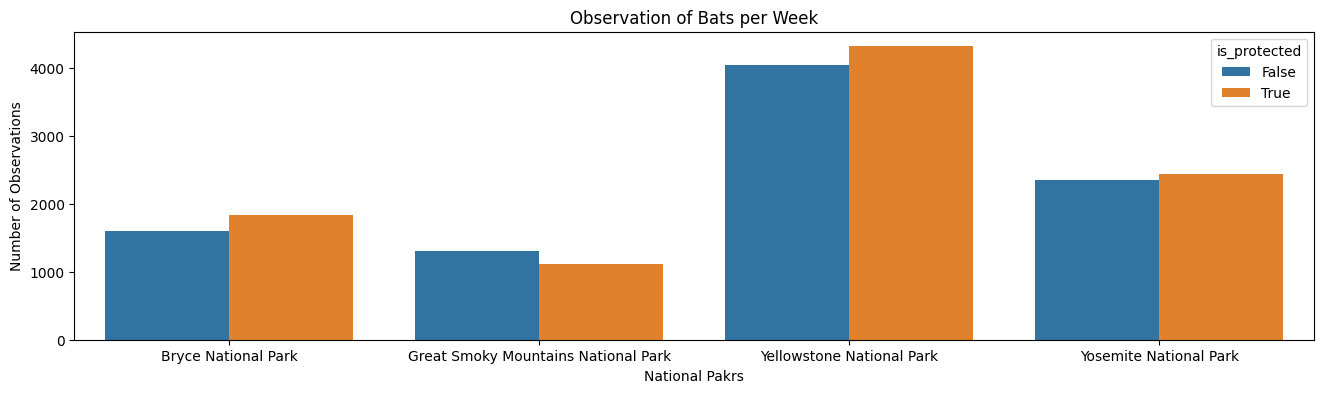

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(16,4))
sns.barplot(x='park_name', y='observations', data=obs_by_park, hue='is_protected')
plt.xlabel('National Pakrs')
plt.ylabel('Number of Observations')
plt.title('Observation of Bats per Week')
plt.show()
plt.clf()

Below, the graph represents the number of species observed for each category. Additionally, each bar is separated into colored sections based on which park the observation was taken at.

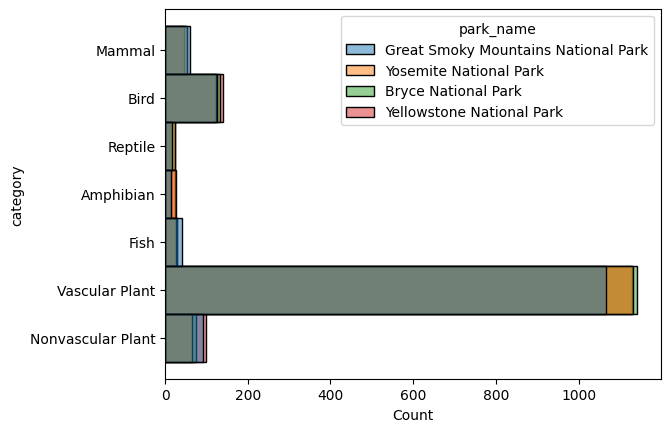

<Figure size 640x480 with 0 Axes>

In [60]:
sns.histplot(y='category', data=species, hue = observations.park_name)
plt.show()
plt.clf()

The table represents the species that had the most amount of observations in each park. The `observations` data set shows that the same species was observed the most in every park.

In [56]:
observations_max = observations.groupby('park_name').max().reset_index()
observations_max

,park_name,scientific_name,observations
0,Bryce National Park,Zygodon viridissimus var. rupestris,176
1,Great Smoky Mountains National Park,Zygodon viridissimus var. rupestris,147
2,Yellowstone National Park,Zygodon viridissimus var. rupestris,321
3,Yosemite National Park,Zygodon viridissimus var. rupestris,223


The graph represents the number of times the most observed species was sighted for each park. While the species was the most common among all of the national parks, it was the observed the most at `Yellowstone National Park`.

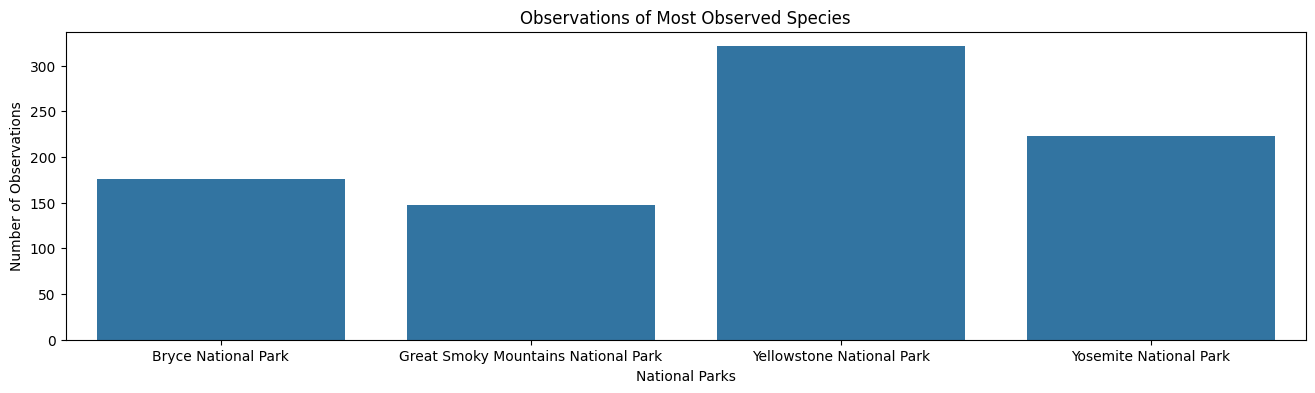

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(16,4))
sns.barplot(x='park_name', y='observations', data=observations_max)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Most Observed Species')
plt.show()
plt.clf()

## Conclusion

Throughout the project, there were several visualizations and statistical inferences made about multiple species. 

In response to the questions mentioned at the beginning of the project:
* What is the distribution of conservation_status for animals? \
    * The distribution of conservation_status for animals showed that the majority of species were not protected.
* Are certain types of species more likely to be endangered?
    * Within the percent_protected table, it was shown that Birds and Mammals have the highest chance of being in protection.
* Are the differences between species and their conservation status significant?
    * When comparing Mammals and Birds, there was not a statistically significant relation between their consevation status. Opposingly, when Mammals and Reptiles were compared, there was a statistically significant relation between their conservation status.
* Which species were spotted the most at each park?
    * When considering only Mammals, bats were found to be the most common species. Additionally, it was noted that they wer found most in Yellowstone National Park. When considering all classes, Zygodon viridissimus var. rupestris, a species of moss, was found to be the most common species, and is also found most often in Yellowstone National Park.

